# Bias Mitigation Analysis - German Credit

In [1]:
data_name = 'German_Credit'

In [2]:
# define desired metric for the use case
ACC_METRIC = 'avg_norm_mcc_score'
FAIR_METRIC = 'abs_avg_eod_score'

In [3]:
import os
import pandas as pd
import numpy as np
results_all = pd.DataFrame()
dir_path = './{}_results/'.format(data_name)
for file in os.listdir(dir_path):
    print(file)
    result = pd.read_pickle(dir_path+file)
    results_all = pd.concat([results_all, result])

German_Credit_results_LR
German_Credit_results_GB
German_Credit_results_NB
German_Credit_results_RF
German_Credit_results_TabTrans
German_Credit_results_SVM


In [4]:
print(results_all.shape)
results_all.head(2)

(960, 19)


,base_estimator,param,Bias_Mitigation,threshold,avg_acc_score,avg_bacc_score,avg_f1_score,avg_auc_score,avg_mcc_score,avg_norm_mcc_score,avg_spd_score,avg_aod_score,avg_eod_score,avg_ford_score,avg_ppvd_score,avg_(1-consistency_score),avg_gei_score,avg_ti_score,cost
0,LR,"{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}",None,0.3,0.738,0.591905,0.836347,0.78619,0.289396,0.644698,-0.066994,-0.060125,-0.036950,-0.000079,-0.051646,0.0998,0.076659,0.083690,0.422296
1,LR,"{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}",None,0.4,0.765,0.655952,0.846905,0.78619,0.386606,0.693303,-0.088203,-0.077101,-0.038273,-0.079435,-0.030706,0.1526,0.083957,0.099237,0.394900


In [5]:
import seaborn as sns
accuracy_metrics = ['acc_score', 'bacc_score', 'f1_score', 'auc_score', 'mcc_score','norm_mcc_score']
group_fairness = ['spd_score', 'aod_score', 'eod_score','ford_score','ppvd_score']
individual_fairness = ['(1-consistency_score)','gei_score','ti_score']
fairness_metrics = group_fairness+individual_fairness
avg_accuracy_metrics = ['avg_'+col for col in accuracy_metrics]
avg_fairness_metrics = ['avg_'+col for col in fairness_metrics]

In [6]:
results_all_converted = results_all.copy(deep=True).reset_index(drop=True)
for col in avg_fairness_metrics:
    abs_col_name = 'abs_'+col
    results_all_converted[abs_col_name] = results_all_converted[col].abs()
# round threshold since 0.4 was 0.399999999 
results_all_converted.threshold = round(results_all_converted.threshold,2)
# base estimator invariant in-processing methods shouldn't have any parameter value
results_all_converted.loc[results_all_converted.Bias_Mitigation.isin(['AD','LFR_in']),['param']] = ''

In [7]:
base_invariant = results_all_converted.loc[results_all_converted.Bias_Mitigation.isin(['AD','LFR_in'])]
for base in results_all_converted.base_estimator.unique():
    if results_all_converted[(results_all_converted.base_estimator==base)\
                             &((results_all_converted.Bias_Mitigation=='AD')|(results_all_converted.Bias_Mitigation=='LFR_in'))].shape[0]==0:
        dup = base_invariant.copy()
        dup['base_estimator'] = dup['base_estimator'].replace({'LR':base})
        results_all_converted = pd.concat([results_all_converted, dup])
results_all_converted.head()

,base_estimator,param,Bias_Mitigation,threshold,avg_acc_score,avg_bacc_score,avg_f1_score,avg_auc_score,avg_mcc_score,avg_norm_mcc_score,...,avg_ti_score,cost,abs_avg_spd_score,abs_avg_aod_score,abs_avg_eod_score,abs_avg_ford_score,abs_avg_ppvd_score,abs_avg_(1-consistency_score),abs_avg_gei_score,abs_avg_ti_score
0,LR,"{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}",None,0.3,0.738,0.591905,0.836347,0.78619,0.289396,0.644698,...,0.083690,0.422296,0.066994,0.060125,0.036950,0.000079,0.051646,0.0998,0.076659,0.083690
1,LR,"{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}",None,0.4,0.765,0.655952,0.846905,0.78619,0.386606,0.693303,...,0.099237,0.394900,0.088203,0.077101,0.038273,0.079435,0.030706,0.1526,0.083957,0.099237
2,LR,"{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}",None,0.5,0.760,0.687619,0.834817,0.78619,0.404027,0.702014,...,0.140002,0.437299,0.139313,0.133722,0.073295,0.068408,0.001388,0.2058,0.106288,0.140002
3,LR,"{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}",None,0.6,0.744,0.706667,0.813147,0.78619,0.408403,0.704201,...,0.189776,0.412100,0.116301,0.098689,0.062672,0.068371,0.006087,0.2440,0.134859,0.189776
4,LR,"{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}",None,0.7,0.719,0.715476,0.781941,0.78619,0.404405,0.702203,...,0.248275,0.413352,0.115555,0.104395,0.051571,0.096930,0.025323,0.2574,0.169881,0.248275


In [8]:
results_all_converted.base_estimator.value_counts()

LR          200
GB          200
NB          200
RF          200
SVM         200
TabTrans    160
Name: base_estimator, dtype: int64

In [9]:
# BEST MODELS
scoring = (ACC_METRIC,FAIR_METRIC,1,1)
w_acc = scoring[2]
w_fair = scoring[3]
acc_cost = 1-results_all_converted[ACC_METRIC]
fair_cost = abs(results_all_converted[FAIR_METRIC])

results_all_converted['cost'] = w_acc*acc_cost + w_fair*fair_cost
best_models = results_all_converted.sort_values(by='cost')[['base_estimator','param','Bias_Mitigation','threshold',
                                                            ACC_METRIC,FAIR_METRIC,'cost']].drop_duplicates(subset='cost').head(10)
best_models.rename({ACC_METRIC: 'Norm. MCC',
                    FAIR_METRIC: 'Abs. '+FAIR_METRIC.removeprefix('abs_').removeprefix('avg_').removesuffix('_score').upper()}, axis=1, inplace=True)
best_models.columns = [col if best_models.columns.get_loc(col) in [4,5]\
                       else col.replace('_',' ').title() for col in best_models.columns] 
f = {best_models.columns[i]:'{:.4f}' for i in range(-3,0)}
f.update({'Threshold':'{:.1f}'})
styled_best_models = best_models.style.format(f).hide(axis="index")
print(styled_best_models.to_latex(hrules=True, label="table:results_{}".format(data_name),
                                  caption="Top 5 Models for {}".format(data_name)).replace('_','\_'))
display(styled_best_models)

\begin{table}
\caption{Top 5 Models for German\_Credit}
\label{table:results\_German\_Credit}
\begin{tabular}{lllrrrr}
\toprule
Base Estimator & Param & Bias Mitigation & Threshold & Norm. MCC & Abs. EOD & Cost \\
\midrule
RF & {'criterion': 'gini', 'max\_depth': 16, 'n\_estimators': 50} & EGR & 0.7 & 0.7062 & 0.0003 & 0.2941 \\
LR & {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'} & RW & 0.6 & 0.7096 & 0.0065 & 0.2968 \\
LR & {'C': 1, 'penalty': 'l2', 'solver': 'saga'} & RW & 0.6 & 0.7091 & 0.0085 & 0.2993 \\
LR & {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'} & RW & 0.7 & 0.6974 & 0.0008 & 0.3034 \\
LR & {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'} & RW & 0.5 & 0.6968 & 0.0008 & 0.3040 \\
LR & {'C': 10, 'penalty': 'l2', 'solver': 'saga'} & RW & 0.7 & 0.6967 & 0.0011 & 0.3044 \\
SVM & {'gamma': 'scale', 'kernel': 'linear'} & RW & 0.6 & 0.7091 & 0.0146 & 0.3056 \\
SVM & {'gamma': 'scale', 'kernel': 'linear'} & RW & 0.7 & 0.6969 & 0.0045 & 0.3076 \\
SVM & {'gamma': 'scale', 'kerne

Base Estimator,Param,Bias Mitigation,Threshold,Norm. MCC,Abs. EOD,Cost
RF,"{'criterion': 'gini', 'max_depth': 16, 'n_estimators': 50}",EGR,0.7,0.7062,0.0003,0.2941
LR,"{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}",RW,0.6,0.7096,0.0065,0.2968
LR,"{'C': 1, 'penalty': 'l2', 'solver': 'saga'}",RW,0.6,0.7091,0.0085,0.2993
LR,"{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}",RW,0.7,0.6974,0.0008,0.3034
LR,"{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}",RW,0.5,0.6968,0.0008,0.3040
LR,"{'C': 10, 'penalty': 'l2', 'solver': 'saga'}",RW,0.7,0.6967,0.0011,0.3044
SVM,"{'gamma': 'scale', 'kernel': 'linear'}",RW,0.6,0.7091,0.0146,0.3056
SVM,"{'gamma': 'scale', 'kernel': 'linear'}",RW,0.7,0.6969,0.0045,0.3076
SVM,"{'gamma': 'scale', 'kernel': 'rbf'}",RW,0.5,0.7067,0.0158,0.3091
NB,{'var_smoothing': 1.0},RW,0.7,0.7000,0.0103,0.3103


## Analysis like in Chen et al. (2023)

In [10]:
diff_dict = {}
for base in results_all_converted.base_estimator.unique():
    None_table = results_all_converted[(results_all_converted.base_estimator==base)&
                                       (results_all_converted.Bias_Mitigation=='None')].reset_index(drop=True)
    diff_dict[base] = {}
    for BM in results_all_converted[results_all_converted.base_estimator==base].Bias_Mitigation.unique():
        if BM == 'None': pass
        else: 
            # print(BM)
            BM_subtable = results_all_converted[(results_all_converted.base_estimator==base)&
                                                (results_all_converted.Bias_Mitigation==BM)].reset_index(drop=True)
            diff_table = BM_subtable.iloc[:,:4]
            diff_table = pd.concat([diff_table,BM_subtable.iloc[:,4:].subtract(None_table.iloc[:,4:])], axis=1)
            diff_dict[base][BM] = diff_table

In [11]:
df = pd.DataFrame()
for base in diff_dict.keys():
    sub_df = pd.concat(diff_dict[base])
    df = pd.concat([df, pd.concat(diff_dict[base])])
df

base_estimator                                             param  \
RW 0              LR  {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}   
   1              LR  {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}   
   2              LR  {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}   
   3              LR  {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}   
   4              LR  {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}   
...              ...                                               ...   
AD 15            SVM                                                     
   16            SVM                                                     
   17            SVM                                                     
   18            SVM                                                     
   19            SVM                                                     

      Bias_Mitigation  threshold  avg_acc_score  avg_bacc_score  avg_f1_score  \
RW 0               RW        0.3          0.002       -0.000476      0.002006   
   1               RW        0.4         -0.013       -0.015952     -0.008321   
   2               RW        0.5         -0.003       -0.006905     -0.001282   
   3               RW        0.6          0.005        0.004524      0.003798   
   4               RW        0.7         -0.004       -0.004762     -0.002781   
...               ...        ...            ...             ...           ...   
AD 15              AD        0.3          0.012        0.092381     -0.010781   
   16              AD        0.4         -0.004        0.077143     -0.023111   
   17              AD        0.5         -0.020        0.047619     -0.033051   
   18              AD        0.6         -0.044       -0.002857     -0.047222   
   19              AD        0.7         -0.042       -0.023333     -0.043994   

       avg_auc_score  avg_mcc_score  avg_norm_mcc_score  ...  avg_ti_score  \
RW 0       -0.002571      -0.000053           -0.000027  ...     -0.004191   
   1       -0.002571      -0.039658           -0.019829  ...      0.007413   
   2       -0.002571      -0.010368           -0.005184  ...     -0.001251   
   3       -0.002571       0.010893            0.005447  ...     -0.004792   
   4       -0.002571      -0.009645           -0.004822  ...      0.002869   
...              ...            ...                 ...  ...           ...   
AD 15      -0.010881       0.104875            0.052437  ...      0.072701   
   16      -0.010881       0.072007            0.036003  ...      0.086574   
   17      -0.010881       0.030194            0.015097  ...      0.086778   
   18      -0.010881      -0.037286           -0.018643  ...      0.082461   
   19      -0.010881      -0.048695           -0.024348  ...      0.062166   

           cost  abs_avg_spd_score  abs_avg_aod_score  abs_avg_eod_score  \
RW 0  -0.026064          -0.056020          -0.049219          -0.026091   
   1  -0.013080          -0.079196          -0.052154          -0.032909   
   2  -0.067309          -0.094415          -0.102976          -0.072493   
   3  -0.061658          -0.070620          -0.078817          -0.056212   
   4  -0.045955          -0.057791          -0.061259          -0.050777   
...         ...                ...                ...                ...   
AD 15  0.072675           0.125834           0.168884           0.125112   
   16  0.098099           0.094246           0.132413           0.134102   
   17  0.109188           0.039151           0.071851           0.124285   
   18  0.172368           0.057689           0.097987           0.153725   
   19  0.175956           0.050642           0.086978           0.151609   

       abs_avg_ford_score  abs_avg_ppvd_score  abs_avg_(1-consistency_score)  \
RW 0             0.000952            0.025089                        -0.0076   
   1            -0.003341            0.046876                        -0.0022   
   2             0.070704            0.034716         

In [12]:
(df.iloc[:,4:10]>0).sum()/df.shape[0]

avg_acc_score         0.363462
avg_bacc_score        0.309615
avg_f1_score          0.409615
avg_auc_score         0.208654
avg_mcc_score         0.275000
avg_norm_mcc_score    0.275000
dtype: float64

In [13]:
(df[df.Bias_Mitigation=='RW'].avg_norm_mcc_score>0).value_counts(normalize=True)

False    0.541667
True     0.458333
Name: avg_norm_mcc_score, dtype: float64

### Accuracy Behavior After Bias Mitigations

In [14]:
from analysis_utils import *
%matplotlib inline

,avg_acc_score,avg_bacc_score,avg_f1_score,avg_auc_score,avg_mcc_score,avg_norm_mcc_score
noorincrease,39,31,41,18,24,24
small,0,2,0,4,4,4
medium,1,4,4,0,5,5
large,12,15,7,30,19,19


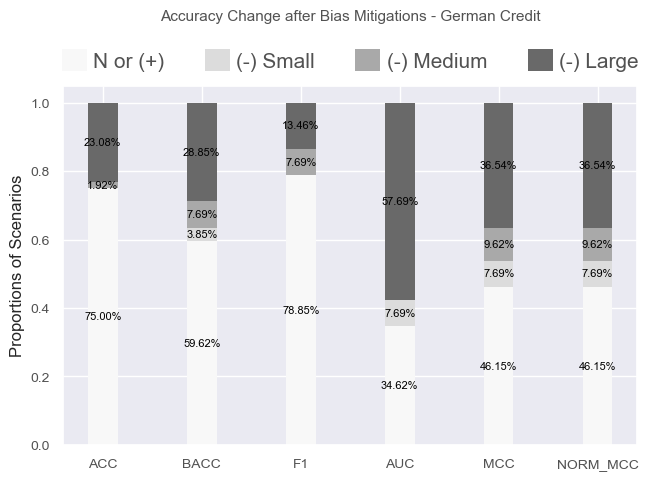

In [15]:
diff_degree = behaviour_analysis(data=results_all_converted, metric_list=avg_accuracy_metrics)
display(pd.DataFrame(diff_degree))
plot_behaviour_analysis(diff_degree, data_name, caption='Accuracy Change after Bias Mitigations - {}', figsize=(8, 6))

### Accuracy Behavior After Bias Mitigations per BM

,RW,LFR_pre,LFR_in,AD,EGR,ROC,CEO,RW+ROC,RW+CEO
noorincrease,5,0,0,4,4,5,1,4,1
small,1,0,0,1,1,0,1,0,0
medium,0,0,0,1,0,1,0,1,2
large,0,5,6,0,0,0,4,1,3


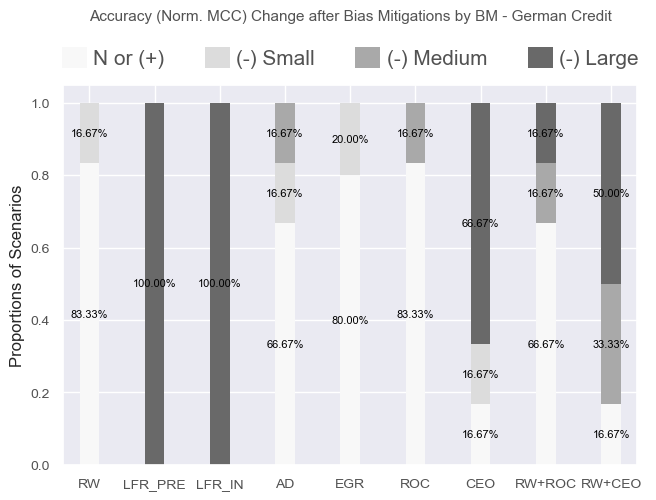

In [16]:
diff_degree = behaviour_analysis(data=results_all_converted, metric_list=[ACC_METRIC], category='bm')
display(pd.DataFrame(diff_degree))
plot_behaviour_analysis(diff_degree, data_name, category='bm', 
                        caption='Accuracy (Norm. MCC) Change after Bias Mitigations by BM - {}', figsize=(8, 6))

### Accuracy Behavior After Bias Mitigations per base

,LR,GB,NB,RF,TabTrans,SVM
noorincrease,2,5,1,5,6,5
small,1,0,3,0,0,0
medium,3,0,1,0,0,1
large,3,4,4,4,1,3


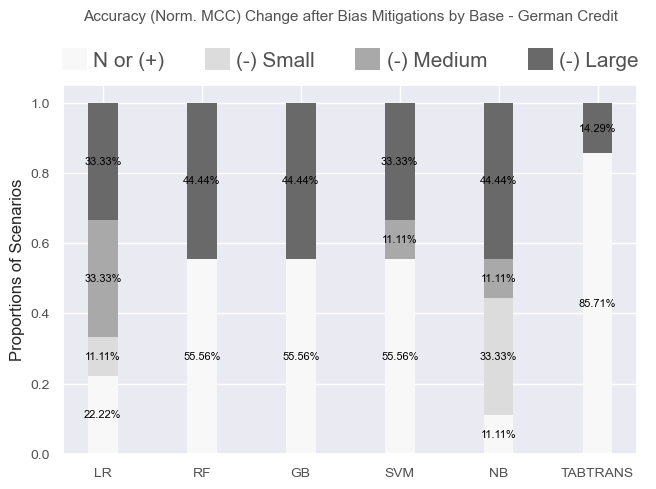

In [17]:
diff_degree = behaviour_analysis(data=results_all_converted, metric_list=[ACC_METRIC], category='base')
display(pd.DataFrame(diff_degree))
plot_behaviour_analysis(diff_degree, data_name, category='base', 
                        caption='Accuracy (Norm. MCC) Change after Bias Mitigations by Base - {}', figsize=(8, 6))

### Fairness Behavior After Bias Mitigations

,abs_avg_spd_score,abs_avg_aod_score,abs_avg_eod_score,abs_avg_ford_score,abs_avg_ppvd_score,abs_avg_(1-consistency_score),abs_avg_gei_score,abs_avg_ti_score
noorincrease,32,35,41,50,44,43,46,44
small,0,0,0,0,1,0,0,1
medium,0,2,2,0,2,1,2,3
large,20,15,9,2,5,8,4,4


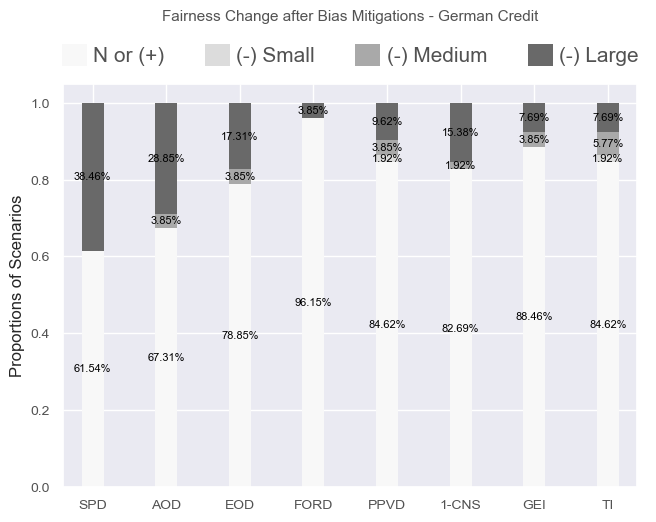

In [18]:
abs_avg_fairness_metrics = ['abs_'+ele for ele in avg_fairness_metrics]
diff_degree = behaviour_analysis(data=results_all_converted, metric_list=abs_avg_fairness_metrics)
display(pd.DataFrame(diff_degree))
plot_behaviour_analysis(diff_degree, data_name, caption='Fairness Change after Bias Mitigations - {}', figsize=(8, 6))

### Fairness Behavior After Bias Mitigations per BM

,RW,LFR_pre,LFR_in,AD,EGR,ROC,CEO,RW+ROC,RW+CEO
noorincrease,3,3,4,6,1,6,6,6,6
small,0,0,0,0,0,0,0,0,0
medium,0,1,1,0,0,0,0,0,0
large,3,1,1,0,4,0,0,0,0


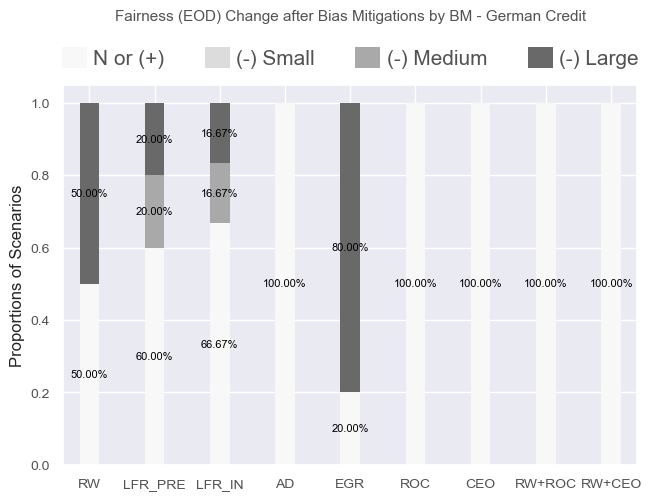

In [19]:
abs_avg_fairness_metrics = ['abs_'+ele for ele in avg_fairness_metrics]
diff_degree = behaviour_analysis(data=results_all_converted, metric_list=[FAIR_METRIC], category='bm')
display(pd.DataFrame(diff_degree))
plot_behaviour_analysis(diff_degree, data_name, category='bm', 
                        caption='Fairness (%s) Change after Bias Mitigations by BM - {}'%(FAIR_METRIC.split('_')[2].upper()),
                        figsize=(8, 6))

### Fairness Behavior After Bias Mitigations per base

,LR,GB,NB,RF,TabTrans,SVM
noorincrease,5,9,7,8,6,6
small,0,0,0,0,0,0
medium,0,0,0,0,1,1
large,4,0,2,1,0,2


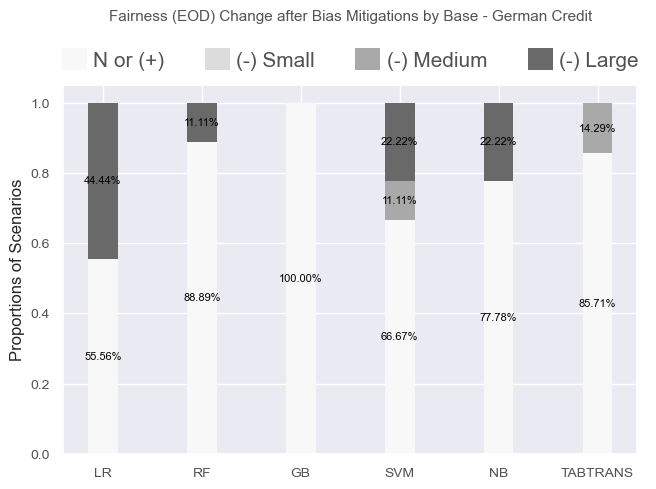

In [20]:
abs_avg_fairness_metrics = ['abs_'+ele for ele in avg_fairness_metrics]
diff_degree = behaviour_analysis(data=results_all_converted, metric_list=[FAIR_METRIC], category='base')
display(pd.DataFrame(diff_degree))
plot_behaviour_analysis(diff_degree, data_name, category='base', 
                        caption='Fairness (%s) Change after Bias Mitigations by Base - {}'%(FAIR_METRIC.split('_')[2].upper()),
                        figsize=(8, 6))

## Accuracy vs. Fairness

### General Results

(slope > 0: trade-off)
We can see from the graphs below:

1. Overall trend: the higher the accuracy, the lower the group fairness (positive slope)
2. But the choice of metrics does matter:
    - group fairness: ford_score showcased no "trade-offs"
    - accuracy metrics: f1_score and roc_auc_score showed milder "trade-offs"
    - same fairness metric combined with different accuracy metrics can present both positive/negative relations, vice versa

In [21]:
import matplotlib.pyplot as plt

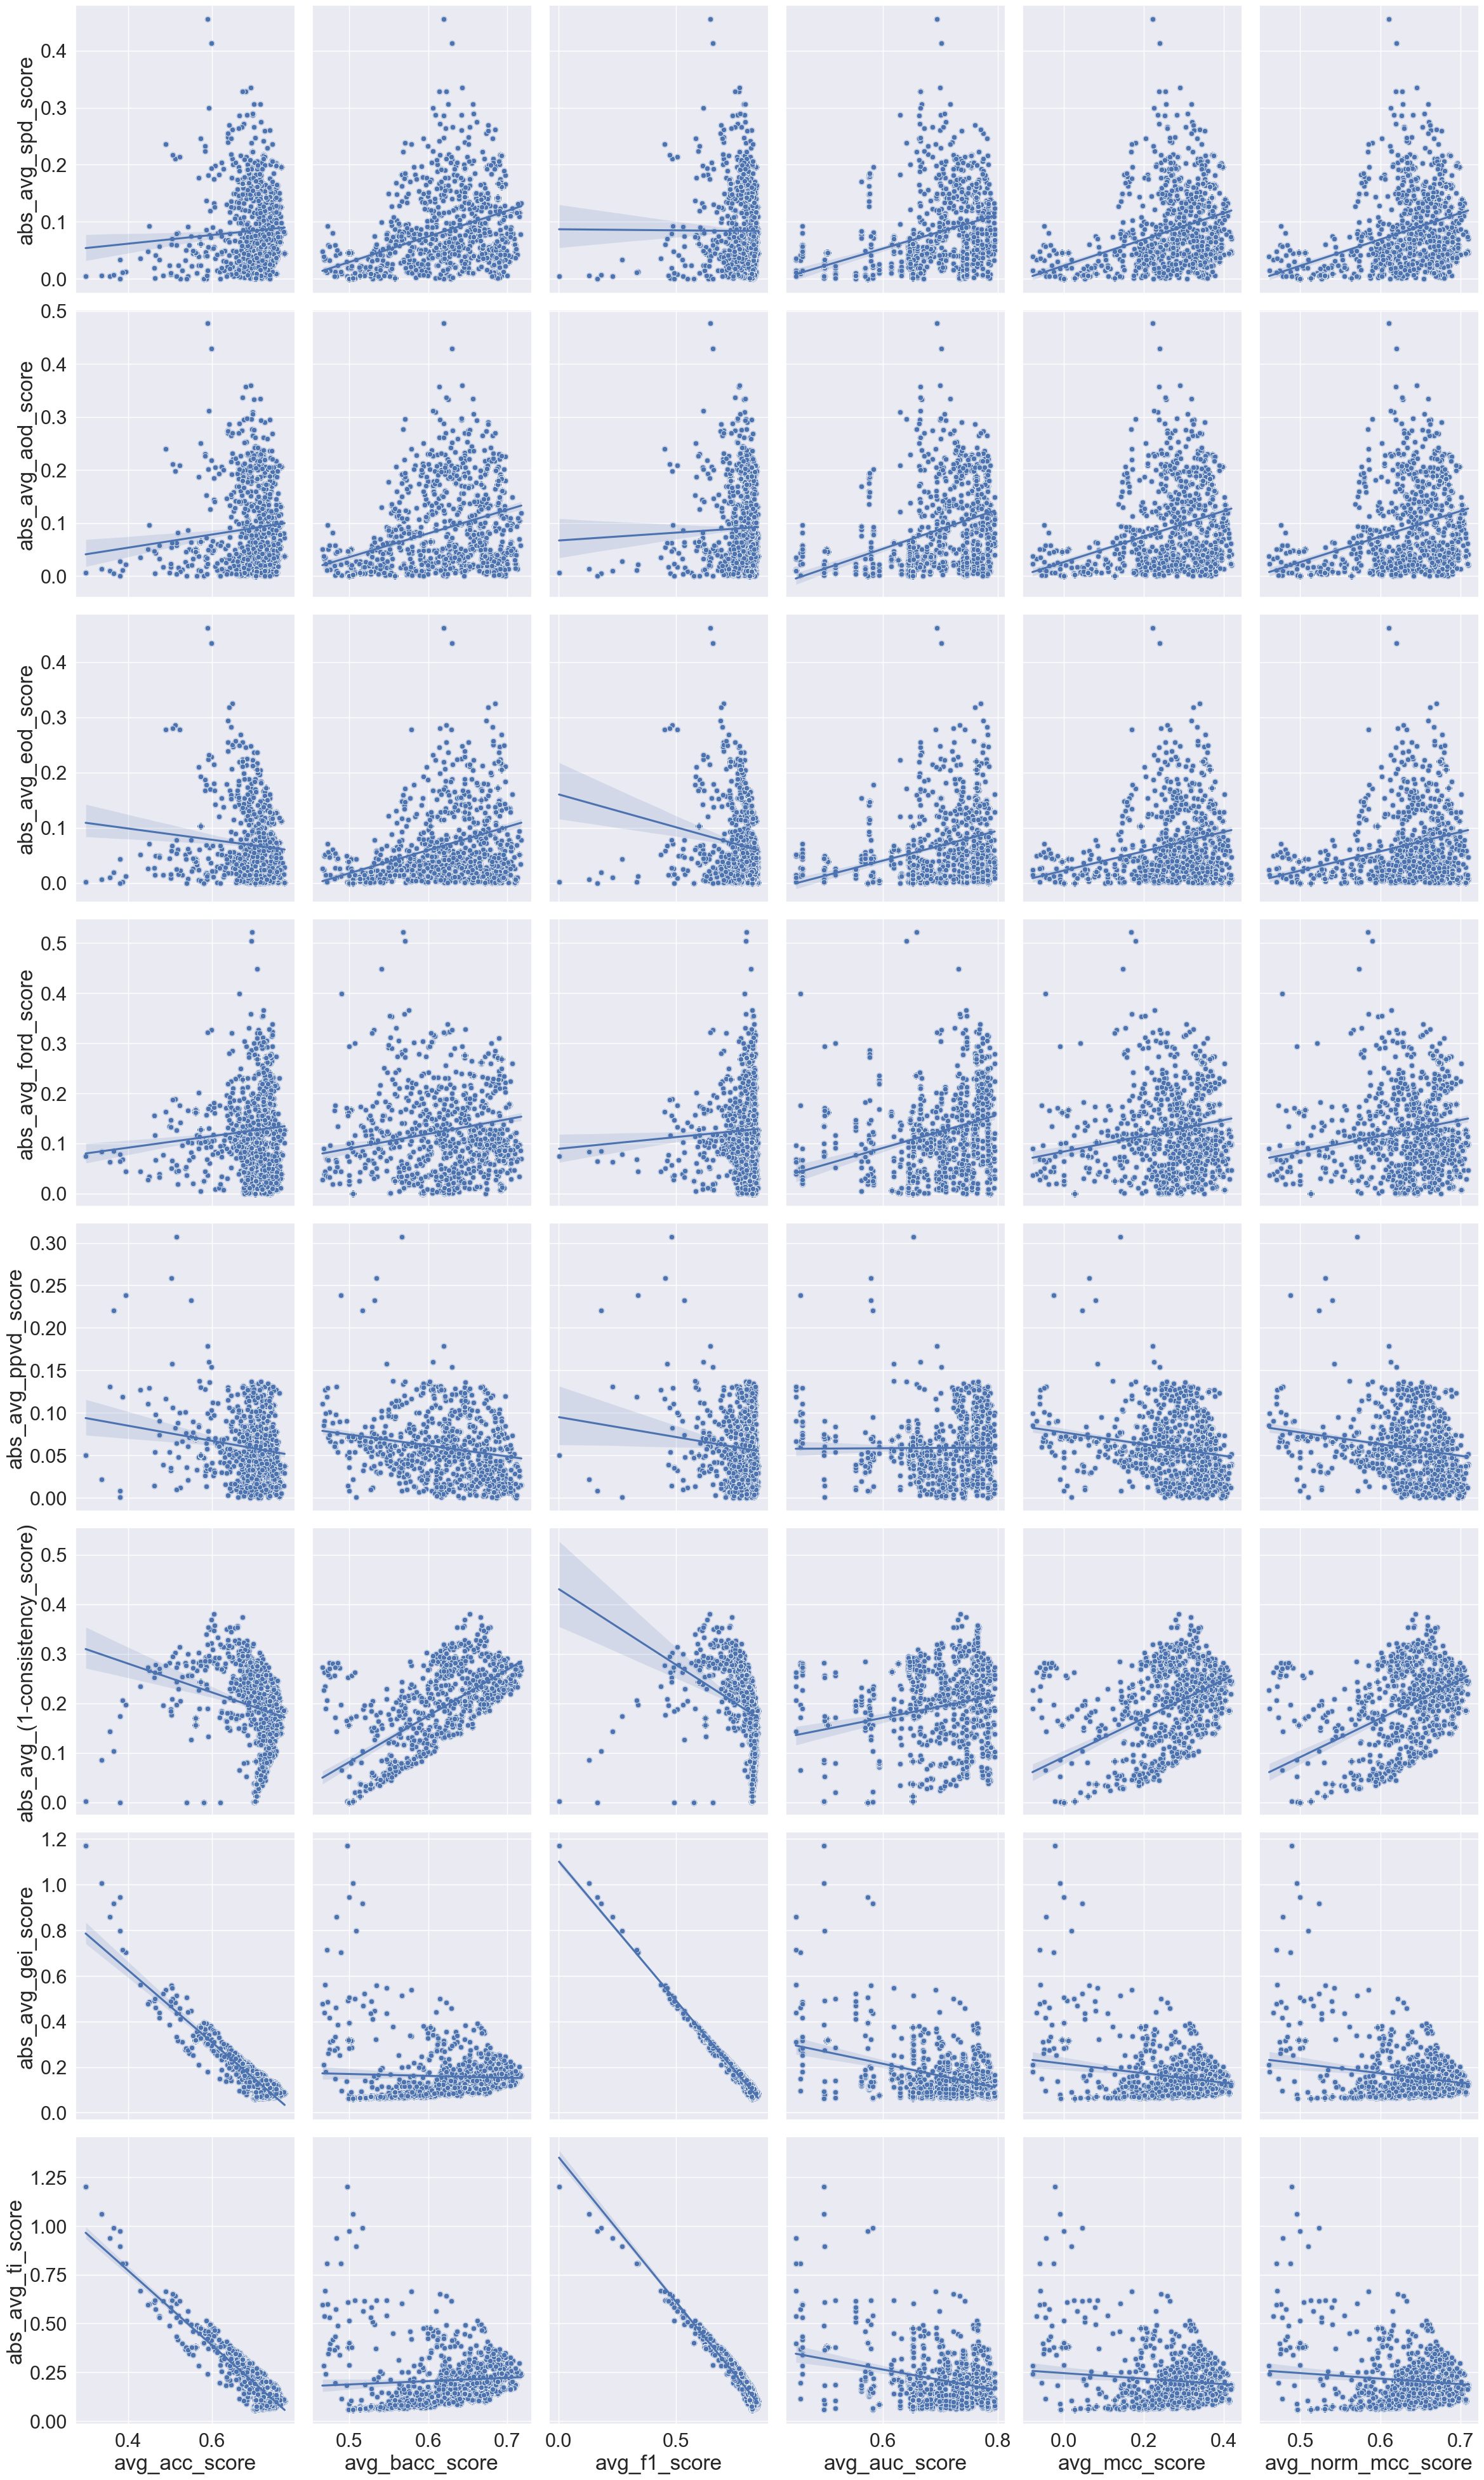

In [22]:
# Set plot font
plt.rcParams.update({'font.family':'serif'})
plt.rcParams.update({'font.serif':'Times New Roman'})

sns.set(font_scale = 2)
abs_fairness_metrics = ['abs_'+col for col in avg_fairness_metrics]
g = sns.pairplot(data=results_all_converted, x_vars=avg_accuracy_metrics, y_vars=abs_fairness_metrics,
             height=5, aspect=.8, kind="reg")
g.map(sns.scatterplot)

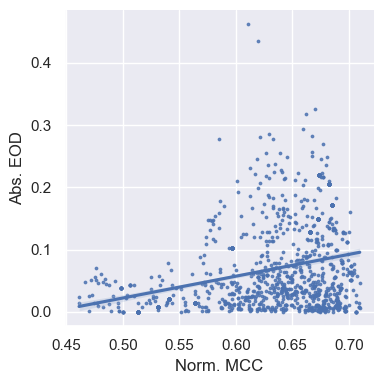

In [23]:
sns.set(font_scale = 1)
g = sns.lmplot(data=results_all_converted, x=ACC_METRIC, y=FAIR_METRIC, height=4, scatter_kws={'s':3})
# .fig.suptitle("Graph (a)")
ax = plt.gca()
ax.set(xlabel='Norm. MCC', ylabel='Abs. '+FAIR_METRIC.removeprefix('abs_').removeprefix('avg_').removesuffix('_score').upper())
# save plot
g.savefig('./Result_Plots/'+data_name+'_2D_general'+'.png', bbox_inches='tight')

### Base_estimator specific Results

We can see from the graphs below:
1. Different base_estimators can also generate very different results:
    - SVM (red) the least robust, while "NB" manifest clear trend
    - base_estimators divided into two groups when it comes to consistency_score: tree-based, ensemble (trade-offs) vs non tree-based, non ensemble

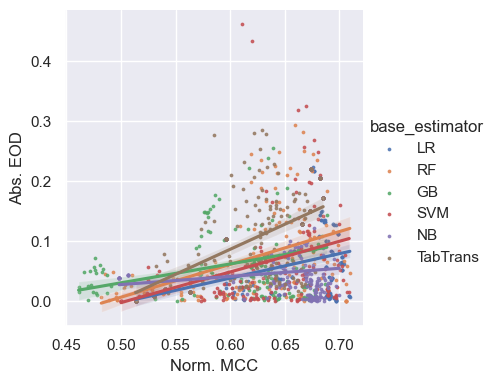

In [24]:
sns.set(font_scale = 1)
g = sns.lmplot(data=results_all_converted, x=ACC_METRIC, y=FAIR_METRIC, hue='base_estimator', 
               hue_order = ['LR','RF','GB','SVM','NB','TabTrans'], height=4, scatter_kws={'s':3})
ax = plt.gca()
ax.set(xlabel='Norm. MCC', ylabel='Abs. '+FAIR_METRIC.removeprefix('abs_').removeprefix('avg_').removesuffix('_score').upper())
# save plot
g.savefig('./Result_Plots/'+data_name+'_2D_Base'+'.png', bbox_inches='tight')

### Threshold specific Results

We can see from the graphs below:

1. Using different threshold also yiels different results:
    - most obvious with (f1_score, group_fairness) combinations

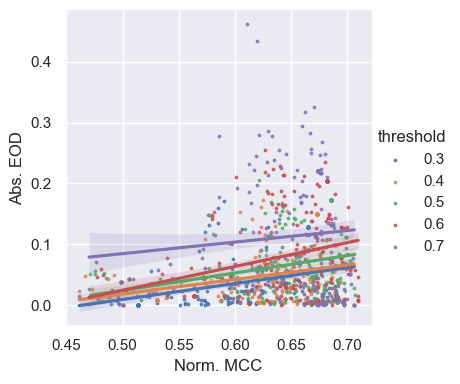

In [25]:
sns.set(font_scale = 1)
g = sns.lmplot(data=results_all_converted, x=ACC_METRIC, y=FAIR_METRIC, hue='threshold', height=4, scatter_kws={'s':3})
ax = plt.gca()
ax.set(xlabel='Norm. MCC', ylabel='Abs. '+FAIR_METRIC.removeprefix('abs_').removeprefix('avg_').removesuffix('_score').upper())
# save plot
g.savefig('./Result_Plots/'+data_name+'_2D_threshold'+'.png', bbox_inches='tight')

### Bias_mitigation specific Results

We can see from the graphs below:

1. Results are clearly divided into two groups
2. Generally with wide C.I.

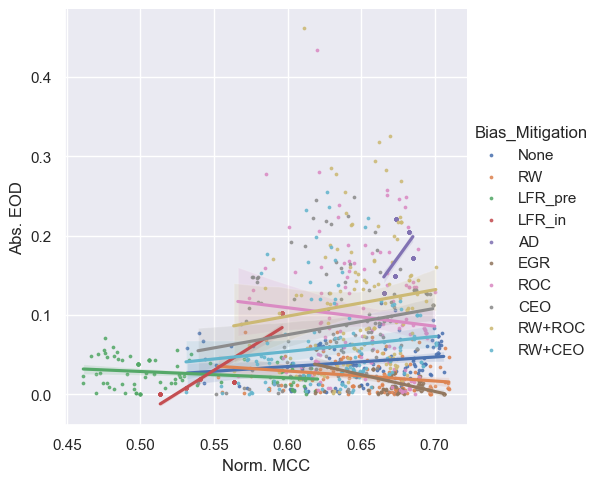

In [26]:
sns.set(font_scale = 1)
g = sns.lmplot(data=results_all_converted, x=ACC_METRIC, y=FAIR_METRIC, hue='Bias_Mitigation', 
               hue_order=['None','RW','LFR_pre','LFR_in','AD','EGR','ROC','CEO','RW+ROC','RW+CEO'],
               scatter_kws={'s': 3}, height=5)
ax = plt.gca()
ax.set(xlabel='Norm. MCC', ylabel='Abs. '+FAIR_METRIC.removeprefix('abs_').removeprefix('avg_').removesuffix('_score').upper())
# save plot
g.savefig('./Result_Plots/'+data_name+'_2D_BM'+'.png', bbox_inches='tight')

In [27]:
# sns.set(font_scale = 1)
# for base in results_all_converted.base_estimator.unique():
#     g = sns.lmplot(data=results_all_converted[results_all_converted.base_estimator==base],
#                    x=ACC_METRIC, y=FAIR_METRIC, hue="Bias_Mitigation", height=4).fig.suptitle(base)

### Bias Mitigation Category

In [28]:
bm_category = {'PRE':['RW', 'LFR_pre'],
               'IN': ['LFR_in','AD','EGR'],
               'POST':['ROC','CEO'],
               'PRE+POST':['RW+ROC','RW+CEO']}

In [29]:
results_all_converted['BM_Category'] = results_all_converted['Bias_Mitigation'].replace({v: k for k, l in bm_category.items()\
                                                                                         for v in l})
results_all_converted[['Bias_Mitigation','BM_Category']].drop_duplicates()

,Bias_Mitigation,BM_Category
0,None,None
5,RW,PRE
10,LFR_pre,PRE
15,LFR_in,IN
20,AD,IN
25,EGR,IN
30,ROC,POST
35,CEO,POST
40,RW+ROC,PRE+POST
45,RW+CEO,PRE+POST


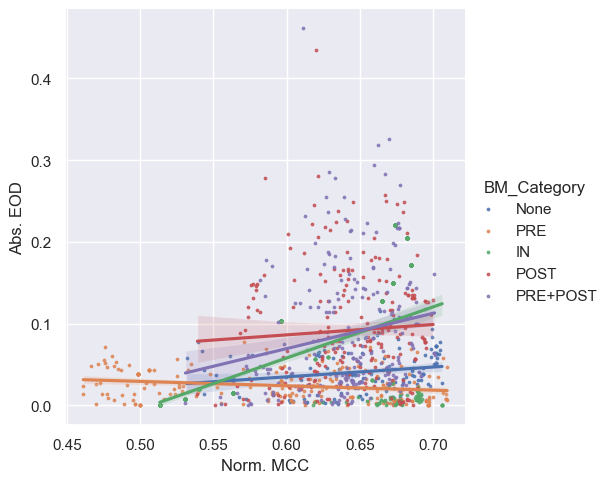

In [30]:
sns.set(font_scale = 1)
g = sns.lmplot(data=results_all_converted, x=ACC_METRIC, y=FAIR_METRIC, hue='BM_Category', 
               scatter_kws={'s': 3}, height=5)
ax = plt.gca()
ax.set(xlabel='Norm. MCC', ylabel='Abs. '+FAIR_METRIC.removeprefix('abs_').removeprefix('avg_').removesuffix('_score').upper())
# save plot
g.savefig('./Result_Plots/'+data_name+'_2D_BM_Category'+'.png', bbox_inches='tight')

In [31]:
# sns.set(font_scale = 1)
# for base in results_all_converted.base_estimator.unique():
#     g = sns.lmplot(data=results_all_converted[results_all_converted.base_estimator==base],
#                    x=ACC_METRIC, y=FAIR_METRIC, hue="BM_Category", height=4).fig.suptitle(base)

## Group vs. Individual Fairness

No clear trend between group and individual fairness with a few exceptions

In [32]:
# g = sns.pairplot(data=results_all_converted,
#                  x_vars=['abs_avg_'+col for col in group_fairness], y_vars=['abs_avg_'+col for col in individual_fairness],
#              height=5, aspect=.8, kind="reg")
# g.map(sns.scatterplot)

### Heatmap

<AxesSubplot:>

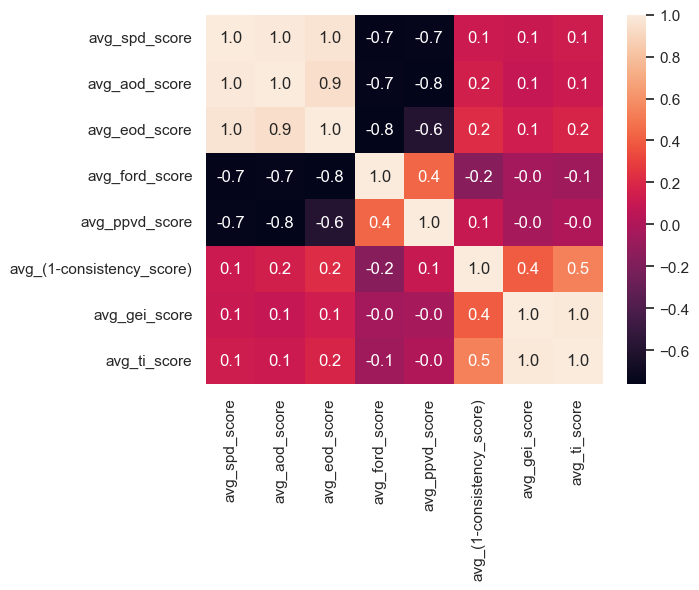

In [33]:
sns.set(font_scale = 1)
# avg_accuracy_metrics = ['avg_'+col for col in accuracy_metrics]
# avg_fairness_metrics = ['avg_'+col for col in fairness_metrics]
sns.heatmap(results_all_converted[avg_fairness_metrics].corr(), annot=True, fmt=".1f")

<AxesSubplot:>

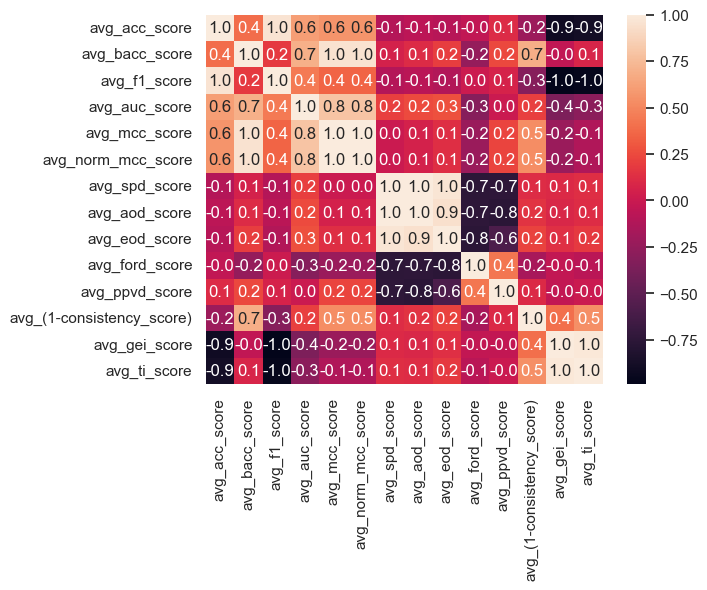

In [34]:
sns.set(font_scale = 1)
# avg_accuracy_metrics = ['avg_'+col for col in accuracy_metrics]
# avg_fairness_metrics = ['avg_'+col for col in fairness_metrics]
sns.heatmap(results_all_converted[avg_accuracy_metrics+avg_fairness_metrics].corr(), annot=True, fmt=".1f")